In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Data

In [2]:
# taking random value of w and b
w = 0.7
b = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim = 1)
y = w*X+b
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [28]:
# splitting data 
train_split = int(0.8*len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [29]:
# plot the data
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    plt.scatter(train_data,train_label,label = "training data")
    plt.scatter(test_data,test_label , label = "test data")
    if predictions is not None:
        plt.scatter(test_data,predictions,label = "predictions")
    
    plt.legend()
 

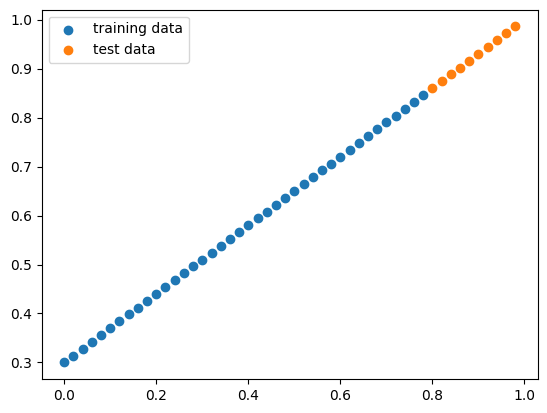

In [30]:
plot_predictions(X_train,y_train,X_test,y_test)   

In [31]:
# building a pytorch linear model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad = True,dtype =torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad = True,dtype =torch.float))
    # forward method to define the computation in the model
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias

torch.manual_seed(42)
model = LinearRegressionModel()
model,model.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

# using linear layer

In [32]:
# creating linear model by using subclasing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1,out_features = 1)
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()
    

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

# TRAINING
for training we need:
1. Loss function
2. Optimizer
3. Training loop
4. Testing loop
    

In [33]:
# setup loss function
loss_fn = nn.L1Loss()
# setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.01)

In [34]:
# writing training loop 
torch.manual_seed(42)
epochs = 200;
for epoch in range(epochs):
    model_1.train()
    # forward pass
    y_pred = model_1(X_train)
    # calculating loss
    loss = loss_fn(y_pred,y_train)
    # optimizer
    optimizer.zero_grad()
    # backpropagation
    loss.backward()
    optimizer.step()
    #### TESTING
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred,y_test)
    # printing whats happening
    if epoch%10==0:
        print(f"Epoch:{epoch}|Loss:{loss}|test loss:{test_loss}")
        

Epoch:0|Loss:0.5551779866218567|test loss:0.5739762187004089
Epoch:10|Loss:0.4399680495262146|test loss:0.4392663538455963
Epoch:20|Loss:0.3247582018375397|test loss:0.30455657839775085
Epoch:30|Loss:0.20954827964305878|test loss:0.16984674334526062
Epoch:40|Loss:0.09433844685554504|test loss:0.03513689711689949
Epoch:50|Loss:0.023886386305093765|test loss:0.04784906655550003
Epoch:60|Loss:0.0199567973613739|test loss:0.04580312222242355
Epoch:70|Loss:0.016517987474799156|test loss:0.0375305712223053
Epoch:80|Loss:0.013089170679450035|test loss:0.029944902285933495
Epoch:90|Loss:0.009653178043663502|test loss:0.02167237363755703
Epoch:100|Loss:0.006215679459273815|test loss:0.014086711220443249
Epoch:110|Loss:0.002787243574857712|test loss:0.005814164876937866
Epoch:120|Loss:0.0012645035749301314|test loss:0.013801807537674904
Epoch:130|Loss:0.0012645035749301314|test loss:0.013801807537674904
Epoch:140|Loss:0.0012645035749301314|test loss:0.013801807537674904
Epoch:150|Loss:0.00126450

In [35]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [36]:
with torch.inference_mode(): 
    y_pred_new = model_1(X_test)

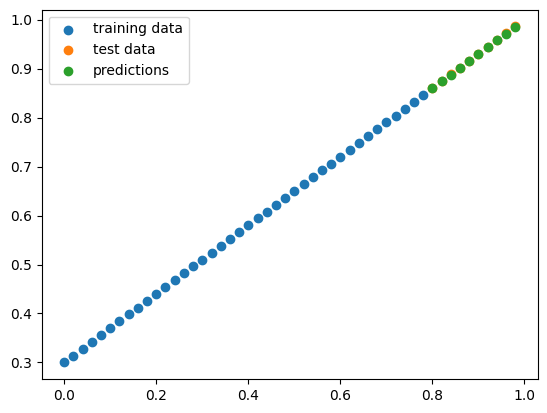

In [37]:
plot_predictions(predictions = y_pred_new)   

# saving and loading a trained model

In [40]:
from pathlib import Path
model_path = Path("models")
model_name = "01_pytorch_workflow_model_1.pth"
model_save_path = model_path/model_name
torch.save(obj = model_1.state_dict(),f = "models/pytorch")

In [44]:
# loading a pytorch model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load("models/pytorch"))

<All keys matched successfully>

In [45]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [46]:
# evaluate loaded model 
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

In [47]:
y_pred_new == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])